<div class="alert alert-block alert-success"> 
<span style="font-size: 20px;"><b>THE SPARKS FOUNDATION</b></span><br>
<span style="font-size: 20px;"><span style="color: green;">DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP</span></span><br>
Prepared by <span style="color: blue;"><b>EDWIN SHERLOCK D. ARCEO</b></span><br>
September 2023
</div>










<br> 
<br> 
<br> 
<br> 
<br> 
<br>

### **INTRODUCTION**

<br>
<br>
<br>
<br>
<br>
<br> 

##### **Loading the data file from the local drive**

In [21]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/eddar/Downloads/SampleSuperstore.csv")

# Display the first few rows of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


***
<br> 
<br> 
<br> 


##### **To explore this data, we'll follow six stages:**

**General Information** <br> 
**Univariate Analysis** <br> 
**Bivariate Analysis** <br> 
**Categorical Analysis** <br> 
**Drilling Down** <br> 
**Conclusions and Business Insights**
<br> 
<br> 
<br> 
<br> 
<br> 

#### **General Information of the dataset**

In [22]:
# General Information of the dataset 1

df.shape, df.isnull().sum()

((9994, 13),
 Ship Mode       0
 Segment         0
 Country         0
 City            0
 State           0
 Postal Code     0
 Region          0
 Category        0
 Sub-Category    0
 Sales           0
 Quantity        0
 Discount        0
 Profit          0
 dtype: int64)

In [23]:
# General Information of the dataset 2

df.dtypes, df.describe()

(Ship Mode        object
 Segment          object
 Country          object
 City             object
 State            object
 Postal Code       int64
 Region           object
 Category         object
 Sub-Category     object
 Sales           float64
 Quantity          int64
 Discount        float64
 Profit          float64
 dtype: object,
         Postal Code         Sales     Quantity     Discount       Profit
 count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
 mean   55190.379428    229.858001     3.789574     0.156203    28.656896
 std    32063.693350    623.245101     2.225110     0.206452   234.260108
 min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
 25%    23223.000000     17.280000     2.000000     0.000000     1.728750
 50%    56430.500000     54.490000     3.000000     0.200000     8.666500
 75%    90008.000000    209.940000     5.000000     0.200000    29.364000
 max    99301.000000  22638.480000    14.000000     0.800000  8399.

### **First Visualization**

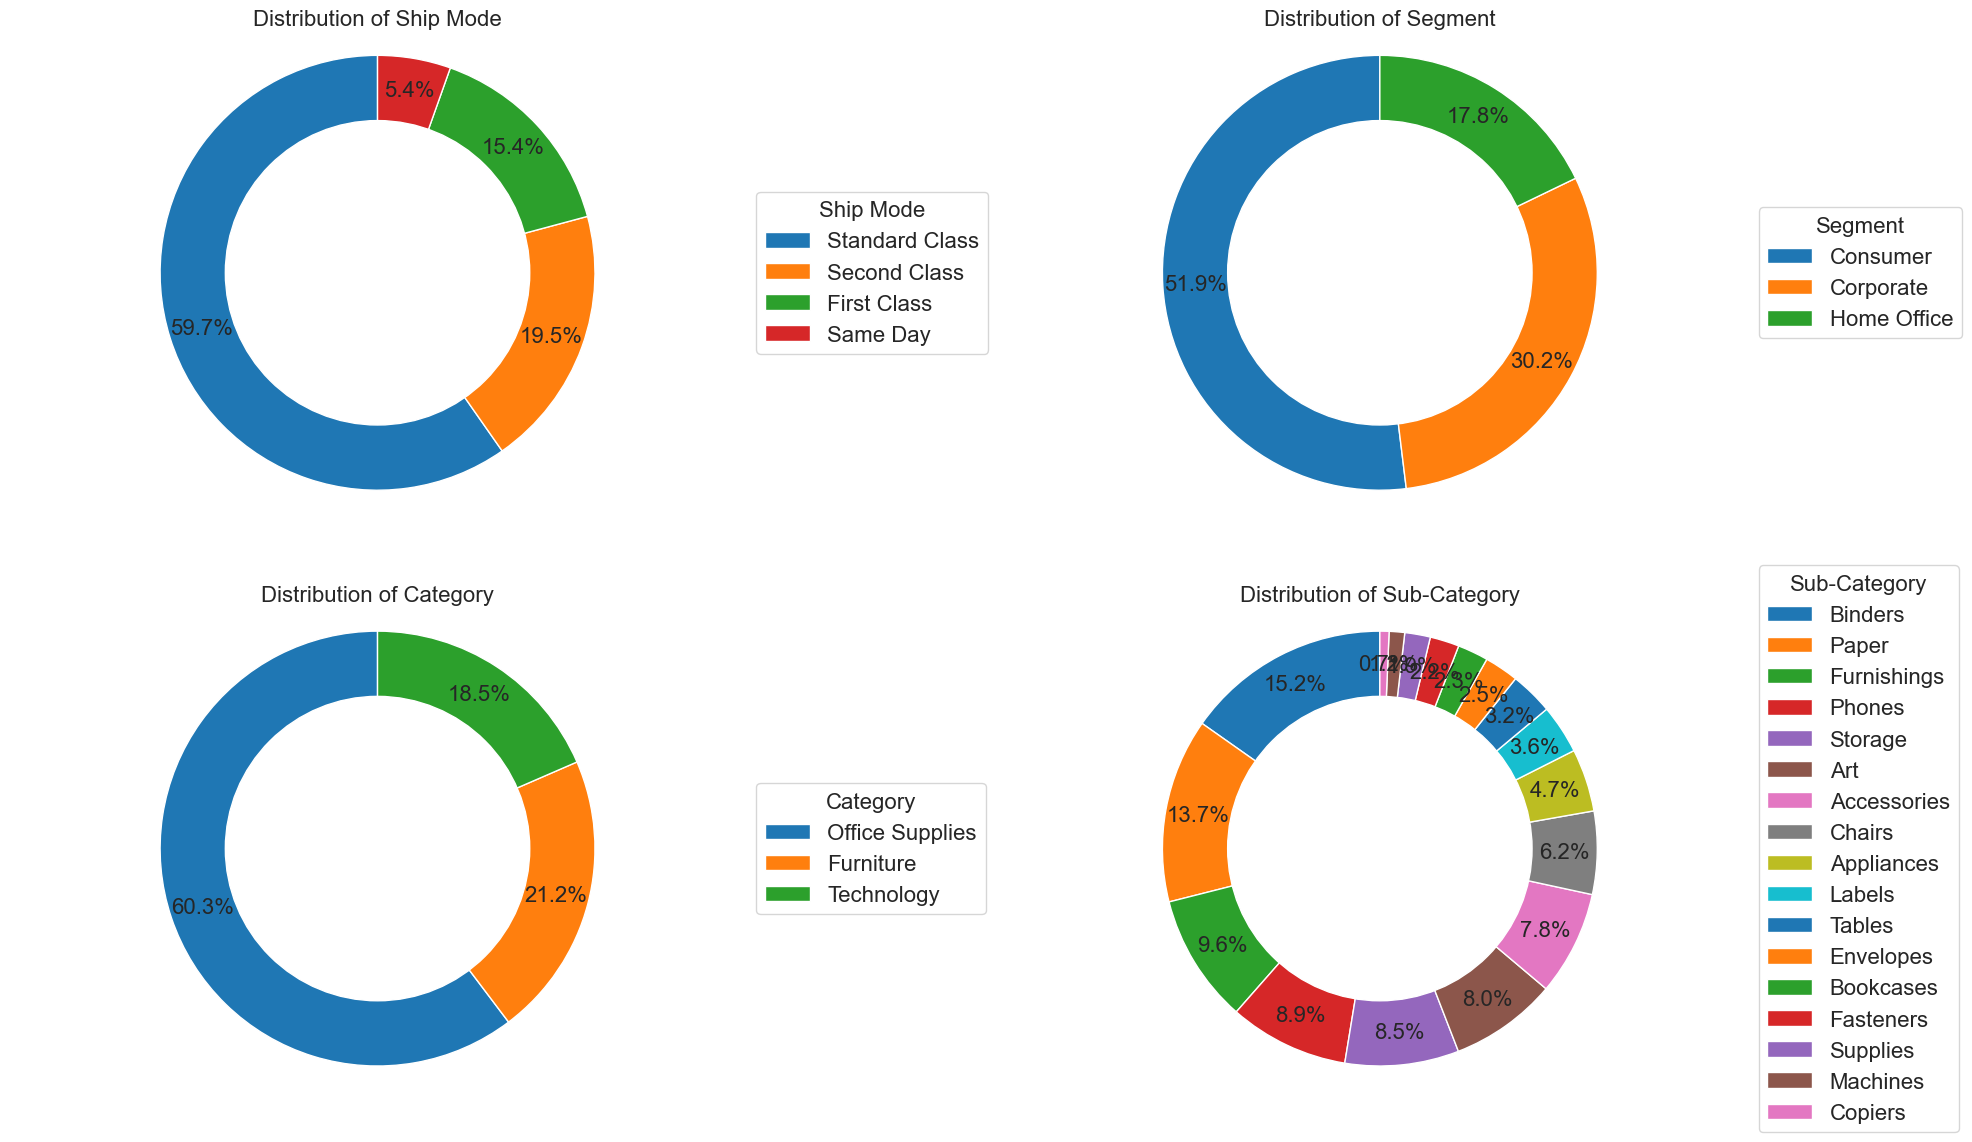

In [24]:
# Set adjustable font sizes for titles and labels
plt.rc('font', size=16)          
plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=14)     
plt.rc('xtick', labelsize=16)    
plt.rc('ytick', labelsize=16)    
plt.rc('legend', fontsize=16)    

# Set up the figure size
plt.figure(figsize=(20, 12))

# List of categorical columns to analyze
categorical_features = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    counts = df[feature].value_counts()
    labels = counts.index
    sizes = counts.values

    # Create a donut chart
    wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
                                       wedgeprops=dict(width=0.4, edgecolor='w'))
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')    # Draw a white circle at the center to create a donut chart
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')                                        # Equal aspect ratio ensures that pie is drawn as a circle
    plt.legend(wedges, labels, title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))         # Create legend
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

***
#### **Univariate Analysis**

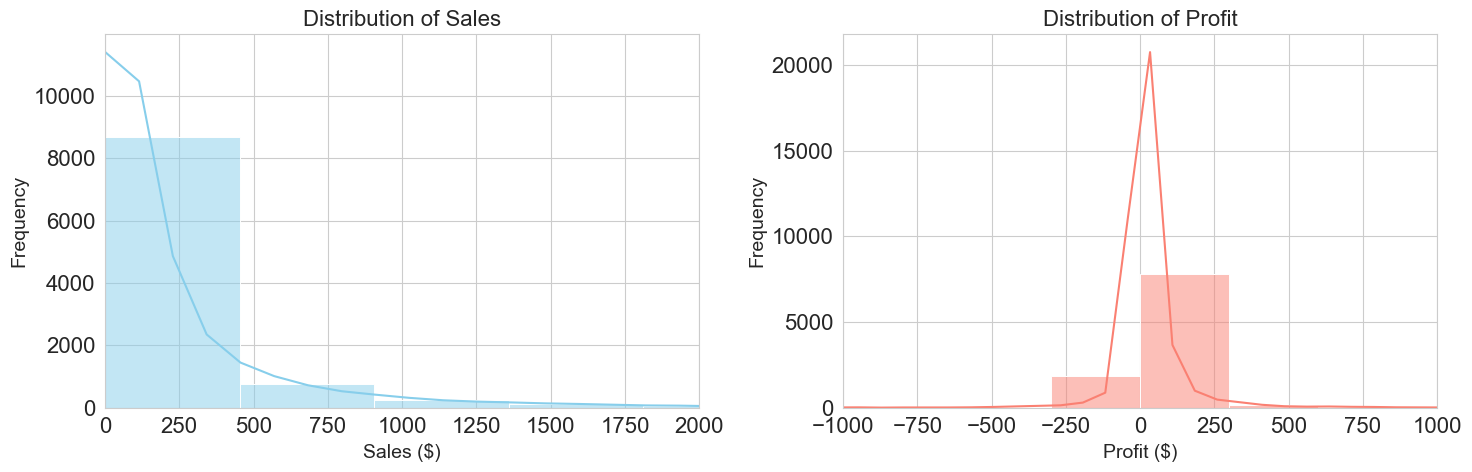

In [25]:
# Setting up aesthetics and initializing plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Plotting distribution of Sales
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.xlim(0, 2000)  # Set x-axis limit to 4000

# Plotting distribution of Profit
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=50, color='salmon', kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.xlim(-1000, 1000)  # Set x-axis limit to 4000

plt.tight_layout()
plt.show()


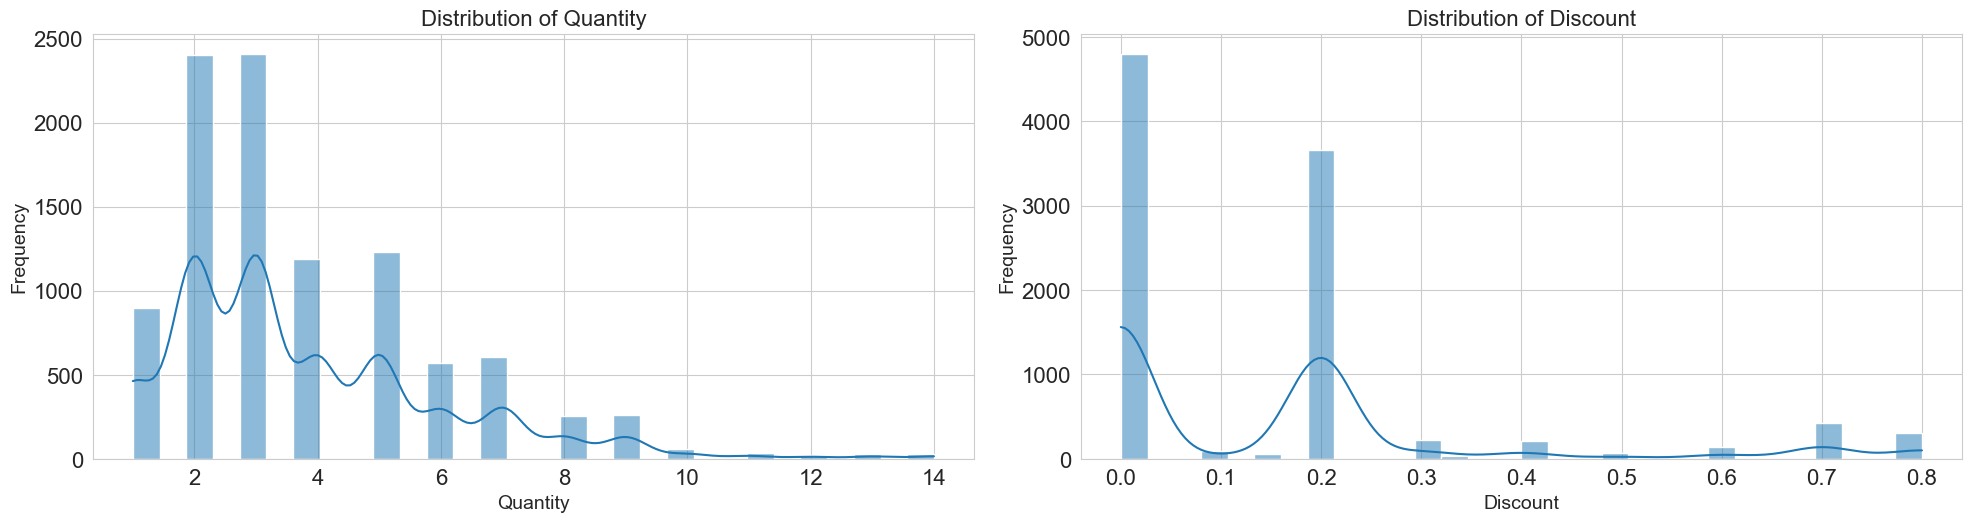

In [26]:
# Create subplots for each numerical column
plt.figure(figsize=(20, 10))
features = ['Quantity', 'Discount']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

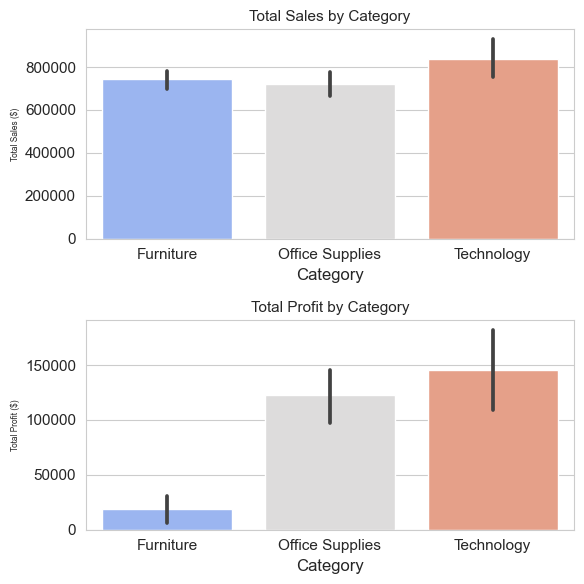

In [27]:
# Set font sizes for all textual labels
plt.rc('font', size=12)          
plt.rc('axes', titlesize=11)     
plt.rc('axes', labelsize=12)     
plt.rc('xtick', labelsize=11)    
plt.rc('ytick', labelsize=11)    

# Plotting Sales by Category
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, palette='coolwarm')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales ($)', fontsize=6)  # Increased fontsize

# Plotting Profit by Category
plt.subplot(2, 1, 2)
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, palette='coolwarm')
plt.title('Total Profit by Category')
plt.ylabel('Total Profit ($)', fontsize=6)  # Increased fontsize

plt.tight_layout()
plt.show()


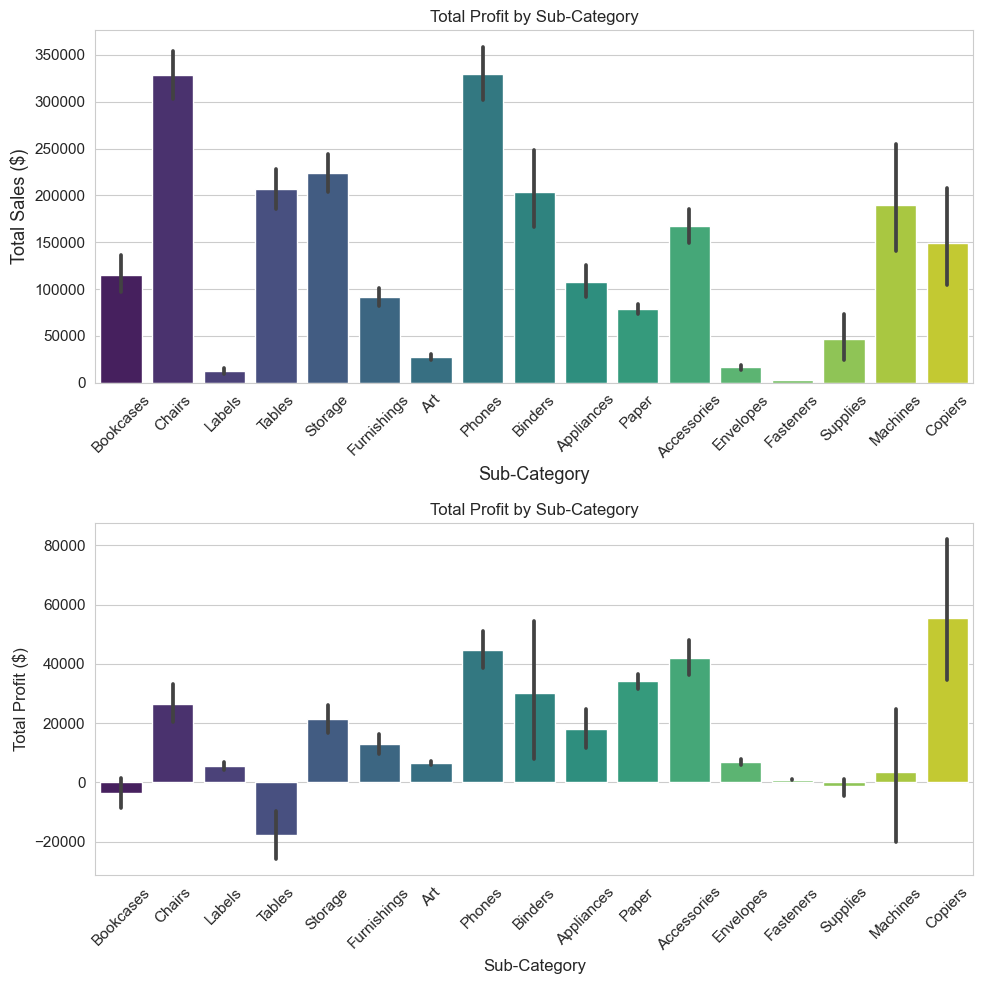

In [28]:
# Plotting Sales by Sub-Category
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, palette='viridis')
plt.title('Total Profit by Sub-Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=13)  # Increased fontsize
plt.xlabel('Sub-Category', fontsize=13) 
plt.yticks(rotation=0, fontsize=11)
plt.xticks(rotation=45, fontsize=11)  # Increased fontsize for xticks

# Plotting Profit by Sub-Category
plt.subplot(2, 1, 2)
sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum, palette='viridis')
plt.title('Total Profit by Sub-Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)  # Increased fontsize
plt.xlabel('Sub-Category', fontsize=12) 
plt.yticks(rotation=0, fontsize=11)
plt.xticks(rotation=45, fontsize=11)  # Increased fontsize for xticks

plt.tight_layout()
plt.show()

***
#### **Bivariate Analysis**

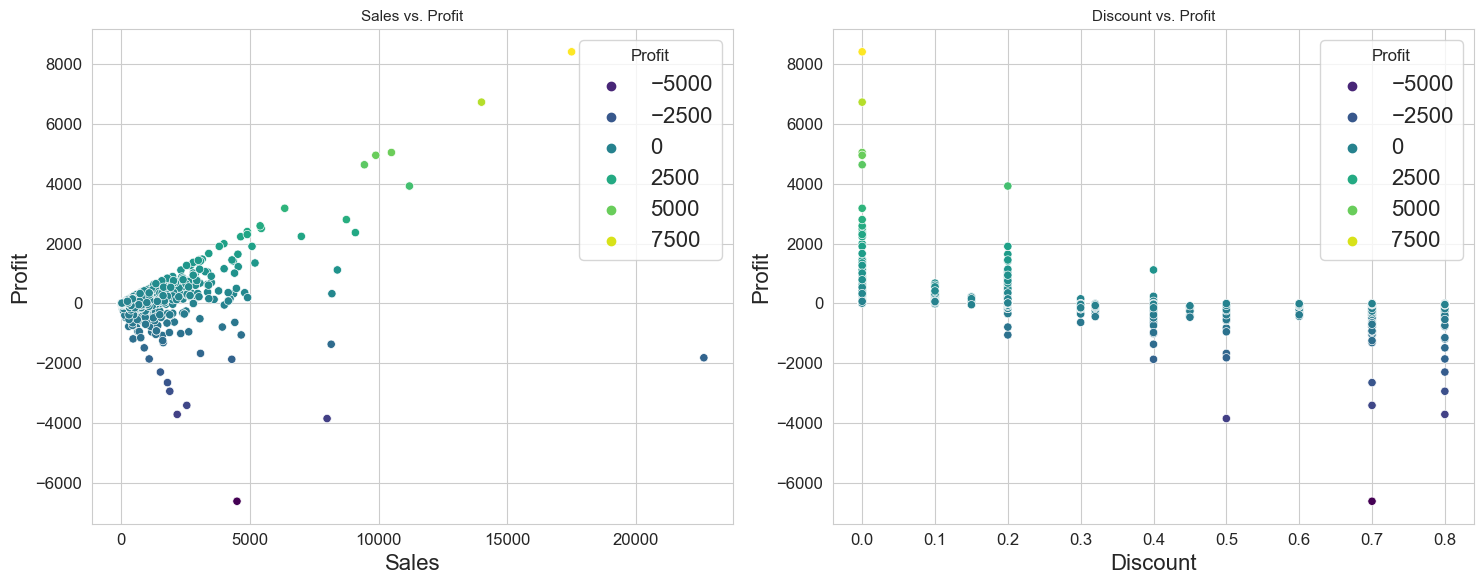

In [29]:
# Set up the figure size
plt.figure(figsize=(15, 6))

# Plotting Sales vs. Profit
plt.subplot(1, 2, 1)
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=1.0, hue='Profit', palette='viridis')
plt.title('Sales vs. Profit')
plt.xlabel('Sales', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Plotting Discount vs. Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=1.0, hue='Profit', palette='viridis')
plt.title('Discount vs. Profit')
plt.xlabel('Discount', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


***
#### **Categorical Analysis**

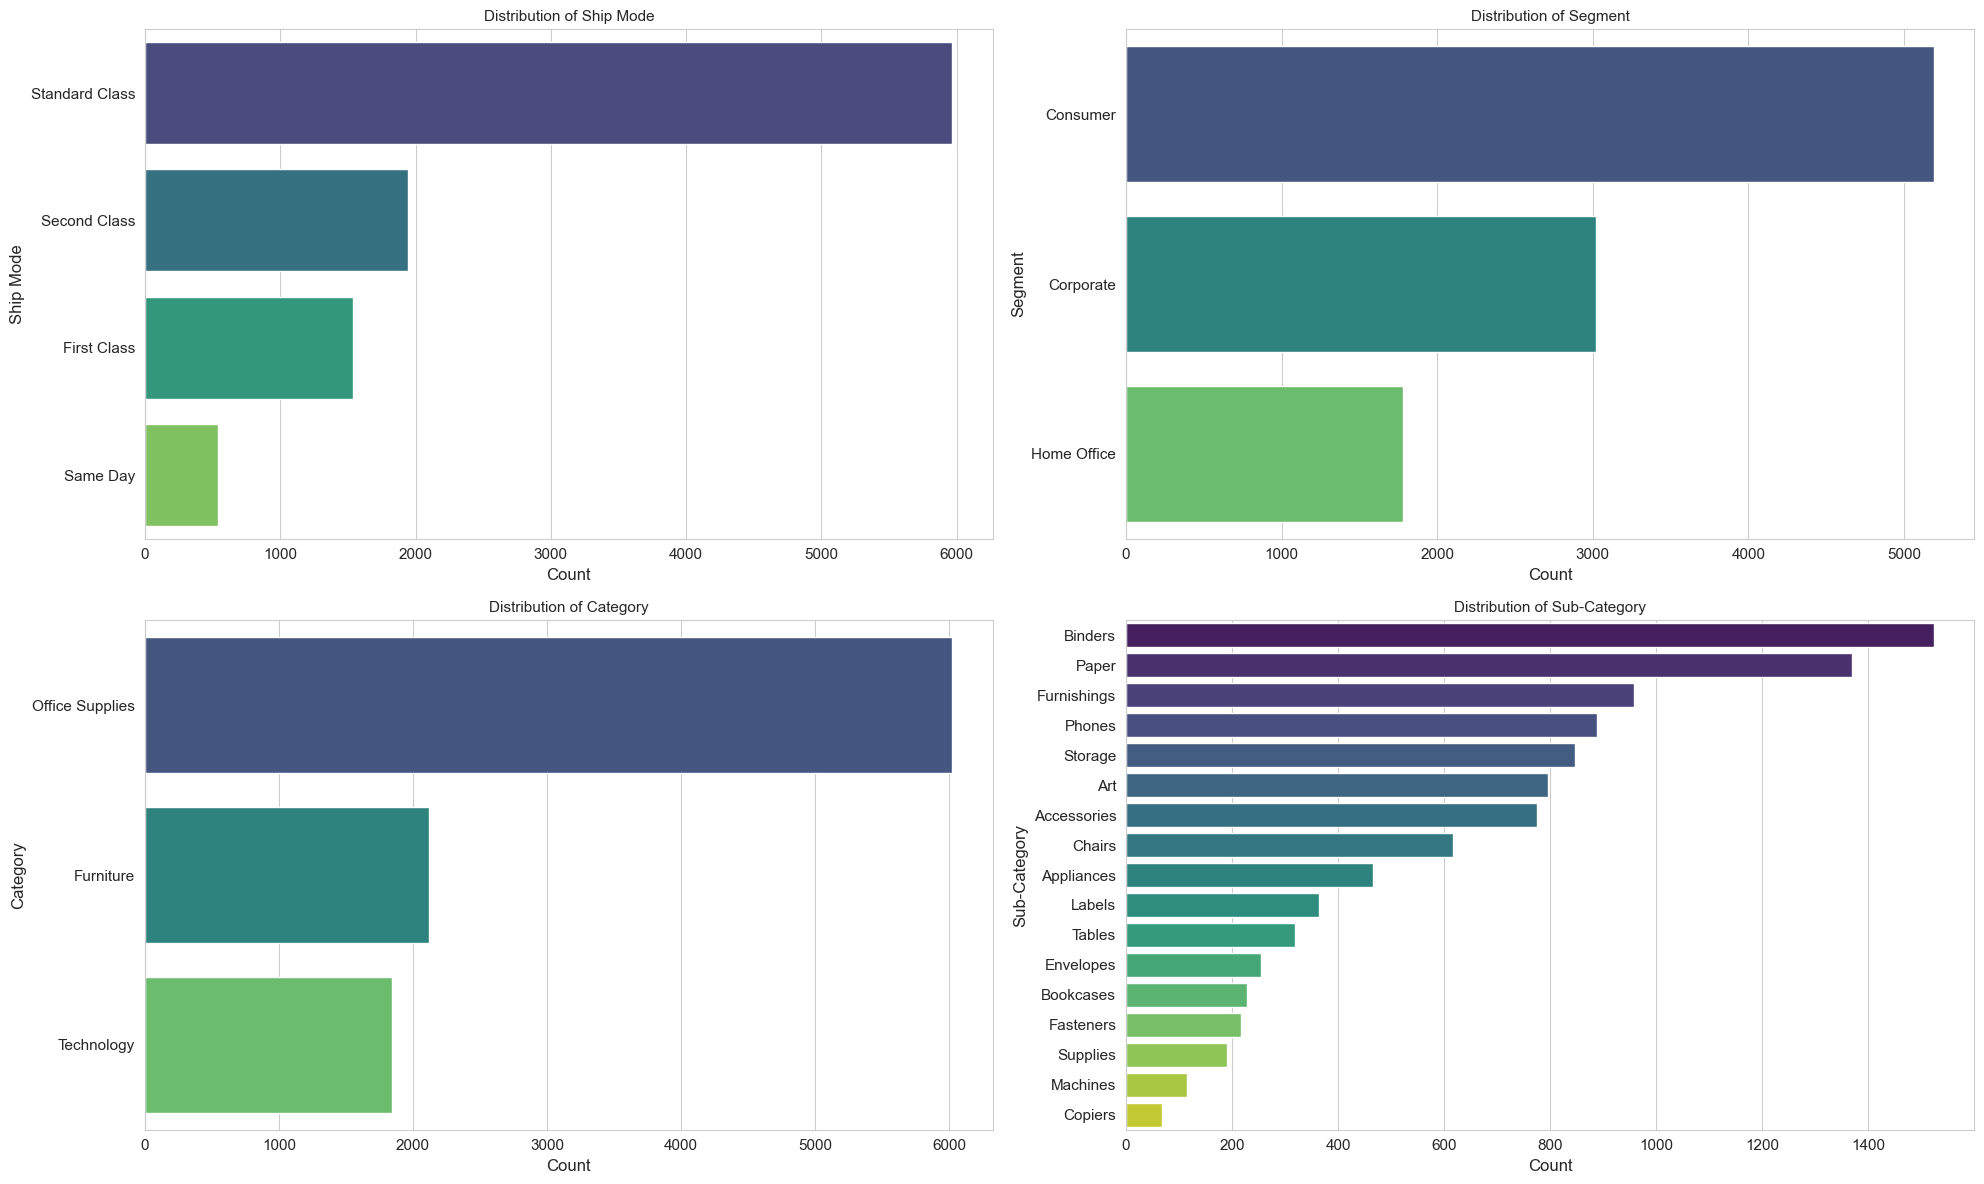

In [30]:
# Set up the figure size
plt.figure(figsize=(20, 12))

# List of categorical columns to analyze
categorical_features = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


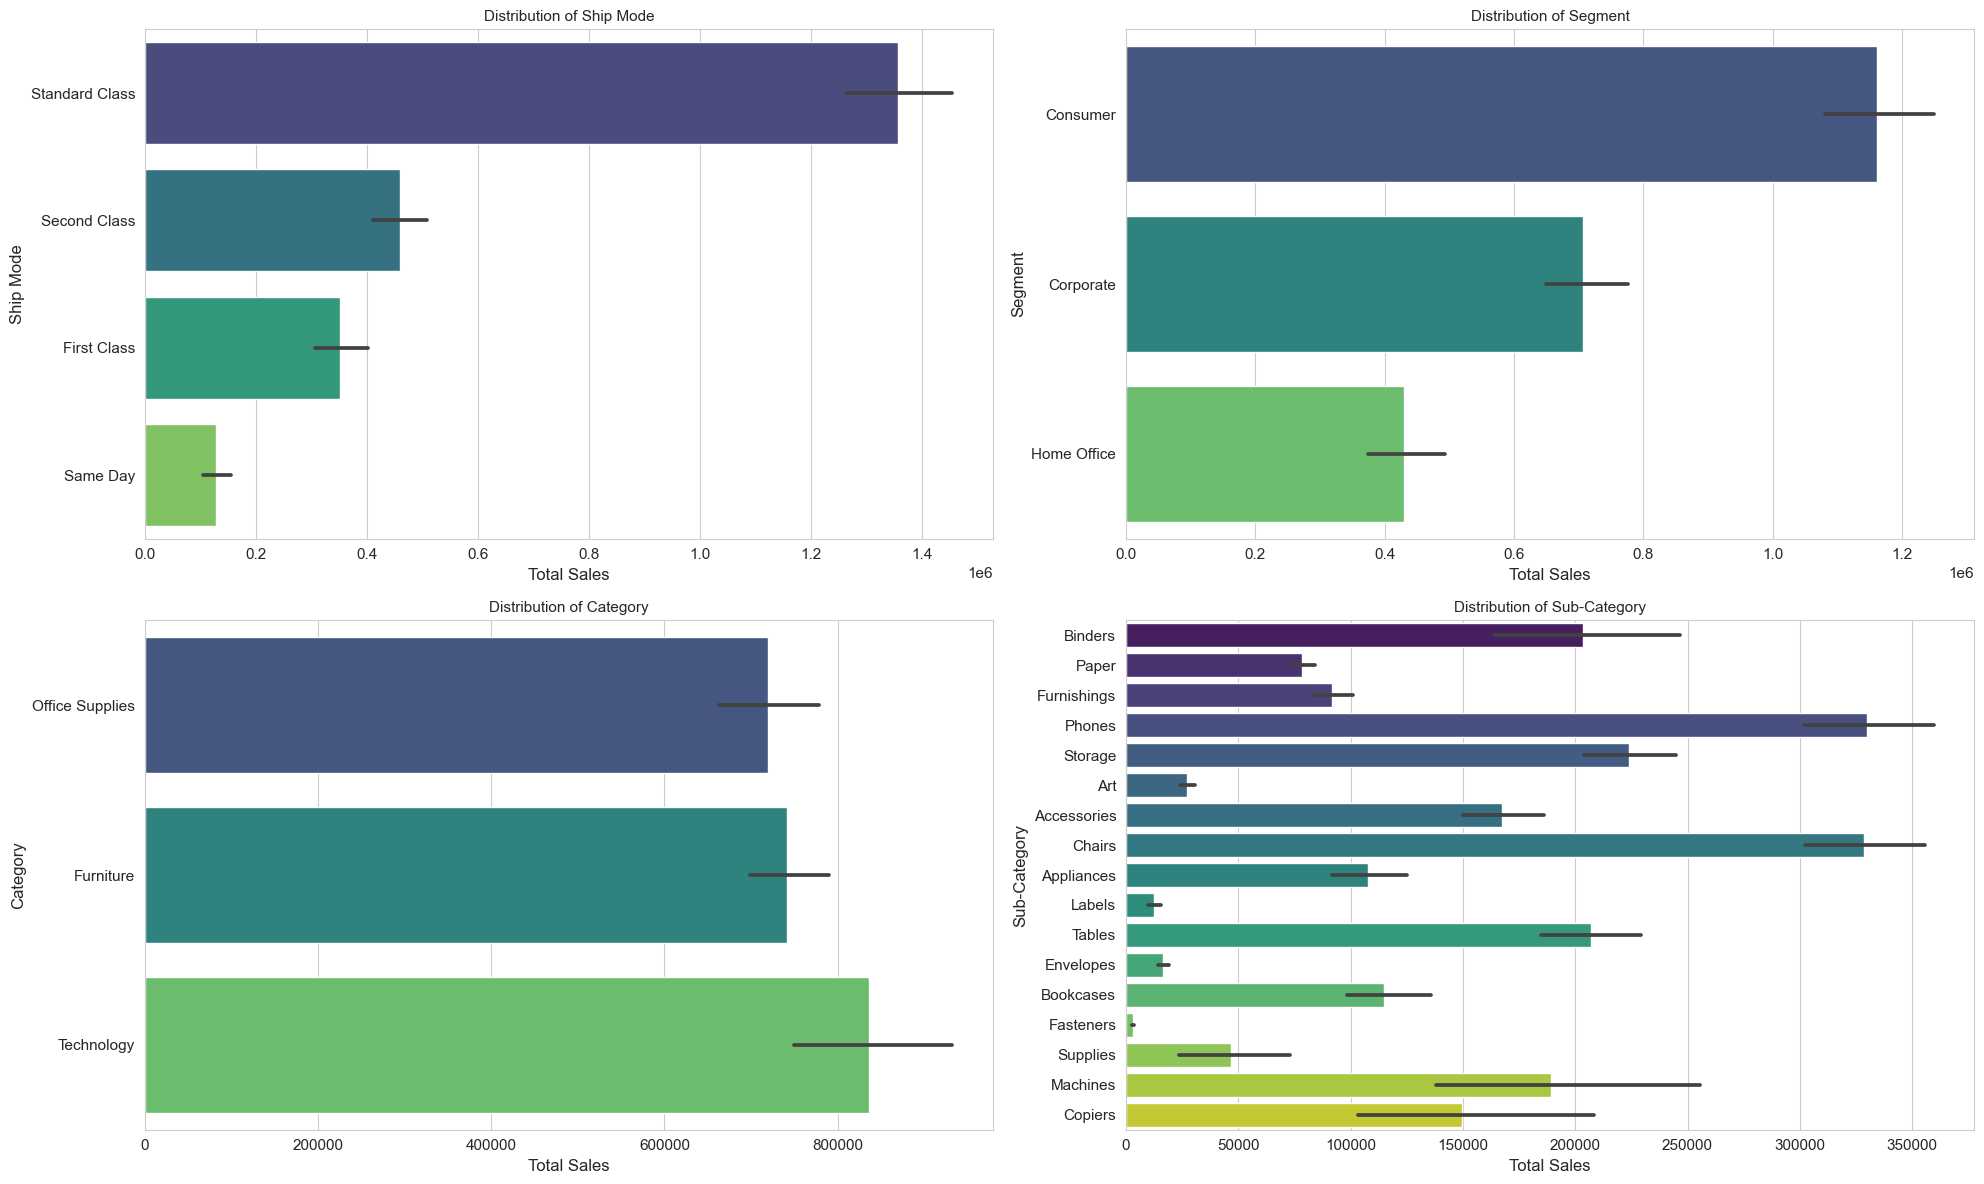

In [31]:
# Set up the figure size
plt.figure(figsize=(20, 12))

# List of categorical columns to analyze
categorical_features = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df, y=feature, x='Sales', estimator=sum, order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Total Sales')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


***
#### **Box Plots**

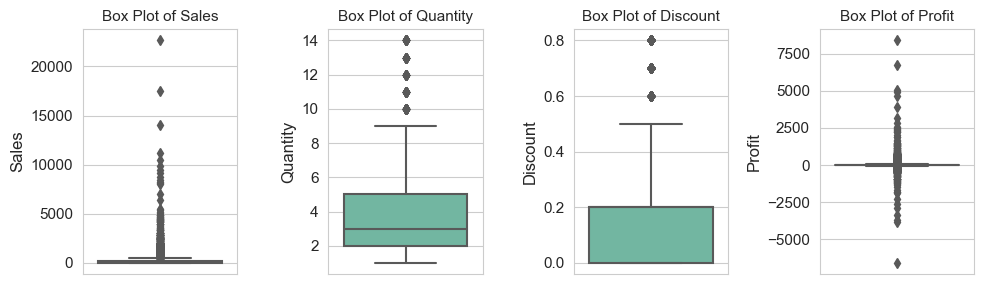

In [32]:
# Reload the dataset
df = pd.read_csv("C:/Users/eddar/Downloads/SampleSuperstore.csv")
features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Creating the Box Plots again
plt.figure(figsize=(10, 3))

# Choose a color palette (e.g., 'pastel' for more color)
colors = sns.color_palette('Set2')

for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[feature], palette=colors)
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


***
##### **Correlation Heatmap**

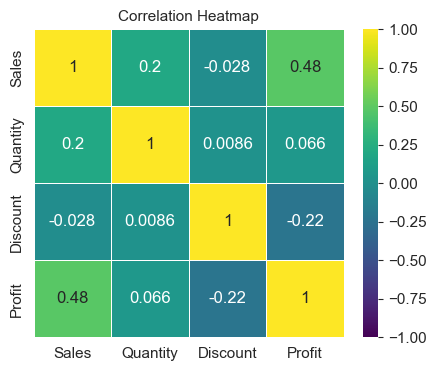

In [33]:
# Correlation heatmap for numerical columns
correlation_matrix = df[features].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


***
#### **Drilling Down Deeper**

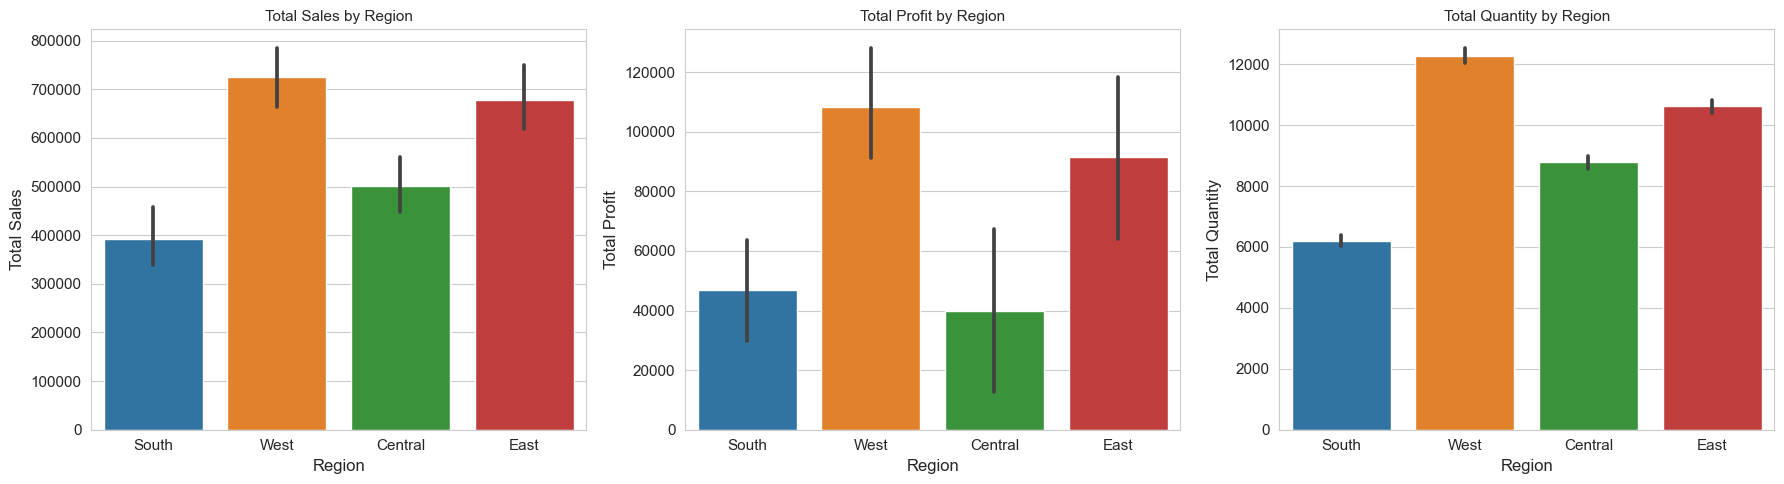

In [34]:
# Regional Analysis

plt.figure(figsize=(18, 5))

# Sales by Region
plt.subplot(1, 3, 1)
sns.barplot(x=df['Region'], y=df['Sales'], estimator=sum)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')

# Profit by Region
plt.subplot(1, 3, 2)
sns.barplot(x=df['Region'], y=df['Profit'], estimator=sum)
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')

# Quantity by Region
plt.subplot(1, 3, 3)
sns.barplot(x=df['Region'], y=df['Quantity'], estimator=sum)
plt.title('Total Quantity by Region')
plt.ylabel('Total Quantity')

plt.tight_layout()
plt.show()


****
#### **Statewise Analysis**

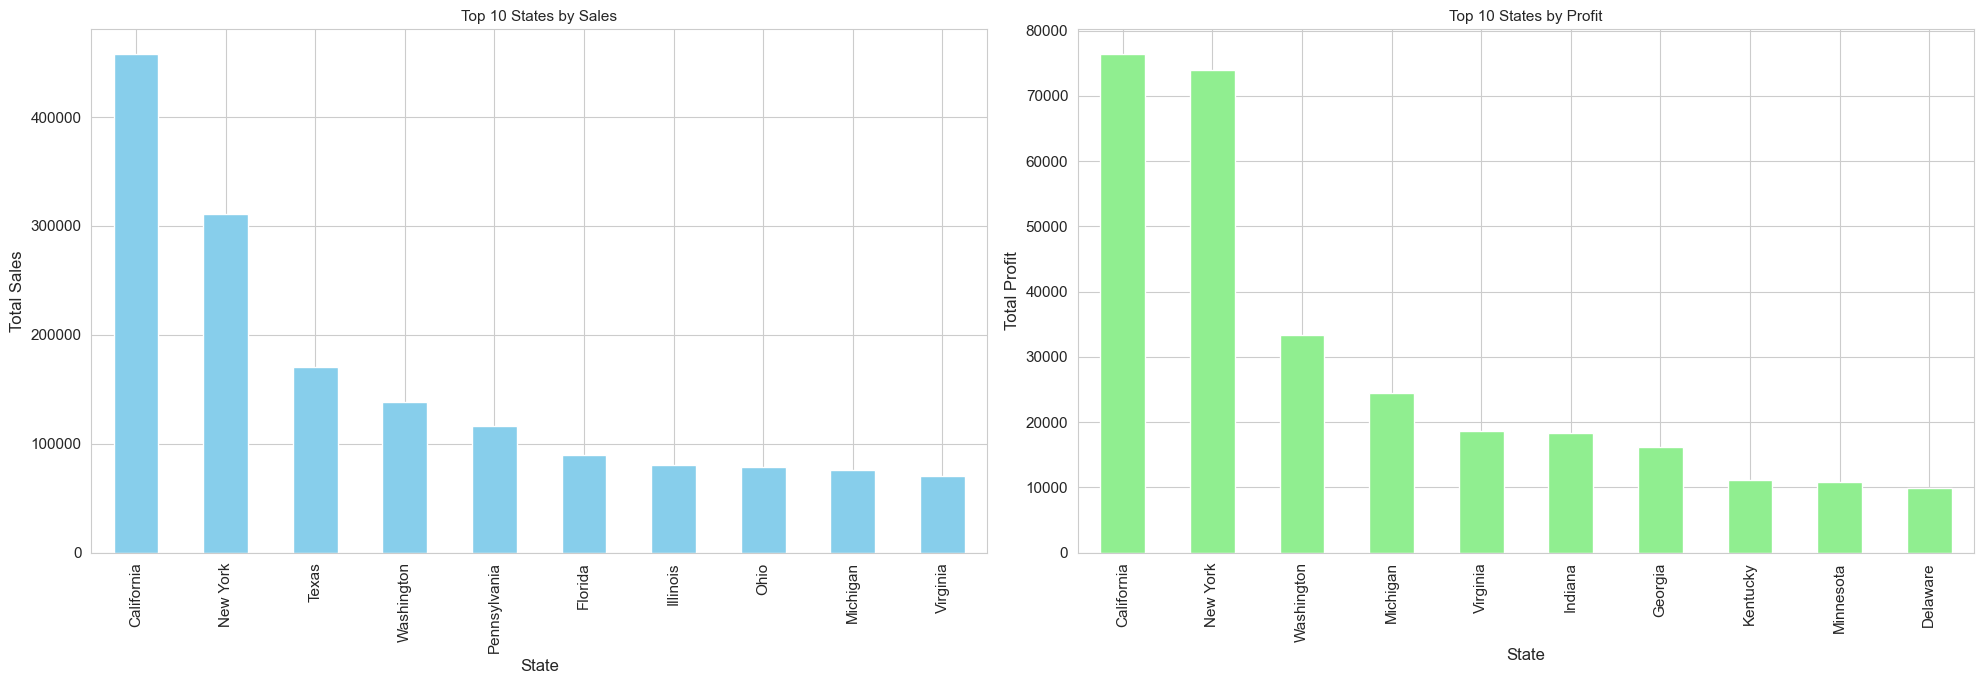

In [35]:
# Statewise Analysis for Sales and Profit

# Top States by Sales
top_sales_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Top States by Profit
top_profit_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 7))

# Plotting Top States by Sales
plt.subplot(1, 2, 1)
top_sales_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Sales')
plt.ylabel('Total Sales')

# Plotting Top States by Profit
plt.subplot(1, 2, 2)
top_profit_states.plot(kind='bar', color='lightgreen')
plt.title('Top 10 States by Profit')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()


***
#### **Segment Analysis** 

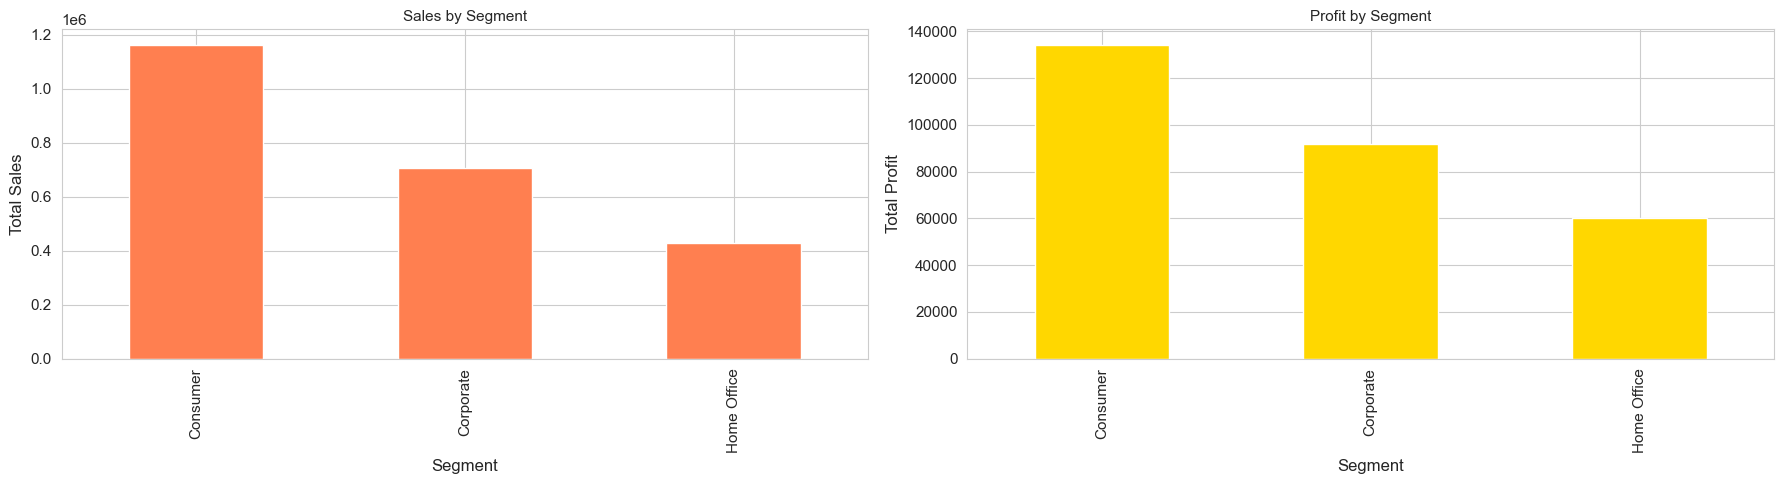

In [36]:
# Segment Analysis for Sales and Profit

segment_sales = df.groupby('Segment')['Sales'].sum()
segment_profit = df.groupby('Segment')['Profit'].sum()

plt.figure(figsize=(18, 5))

# Plotting Sales by Segment
plt.subplot(1, 2, 1)
segment_sales.plot(kind='bar', color='coral')
plt.title('Sales by Segment')
plt.ylabel('Total Sales')

# Plotting Profit by Segment
plt.subplot(1, 2, 2)
segment_profit.plot(kind='bar', color='gold')
plt.title('Profit by Segment')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()


***
#### **Category & Sub-Category Analysis**

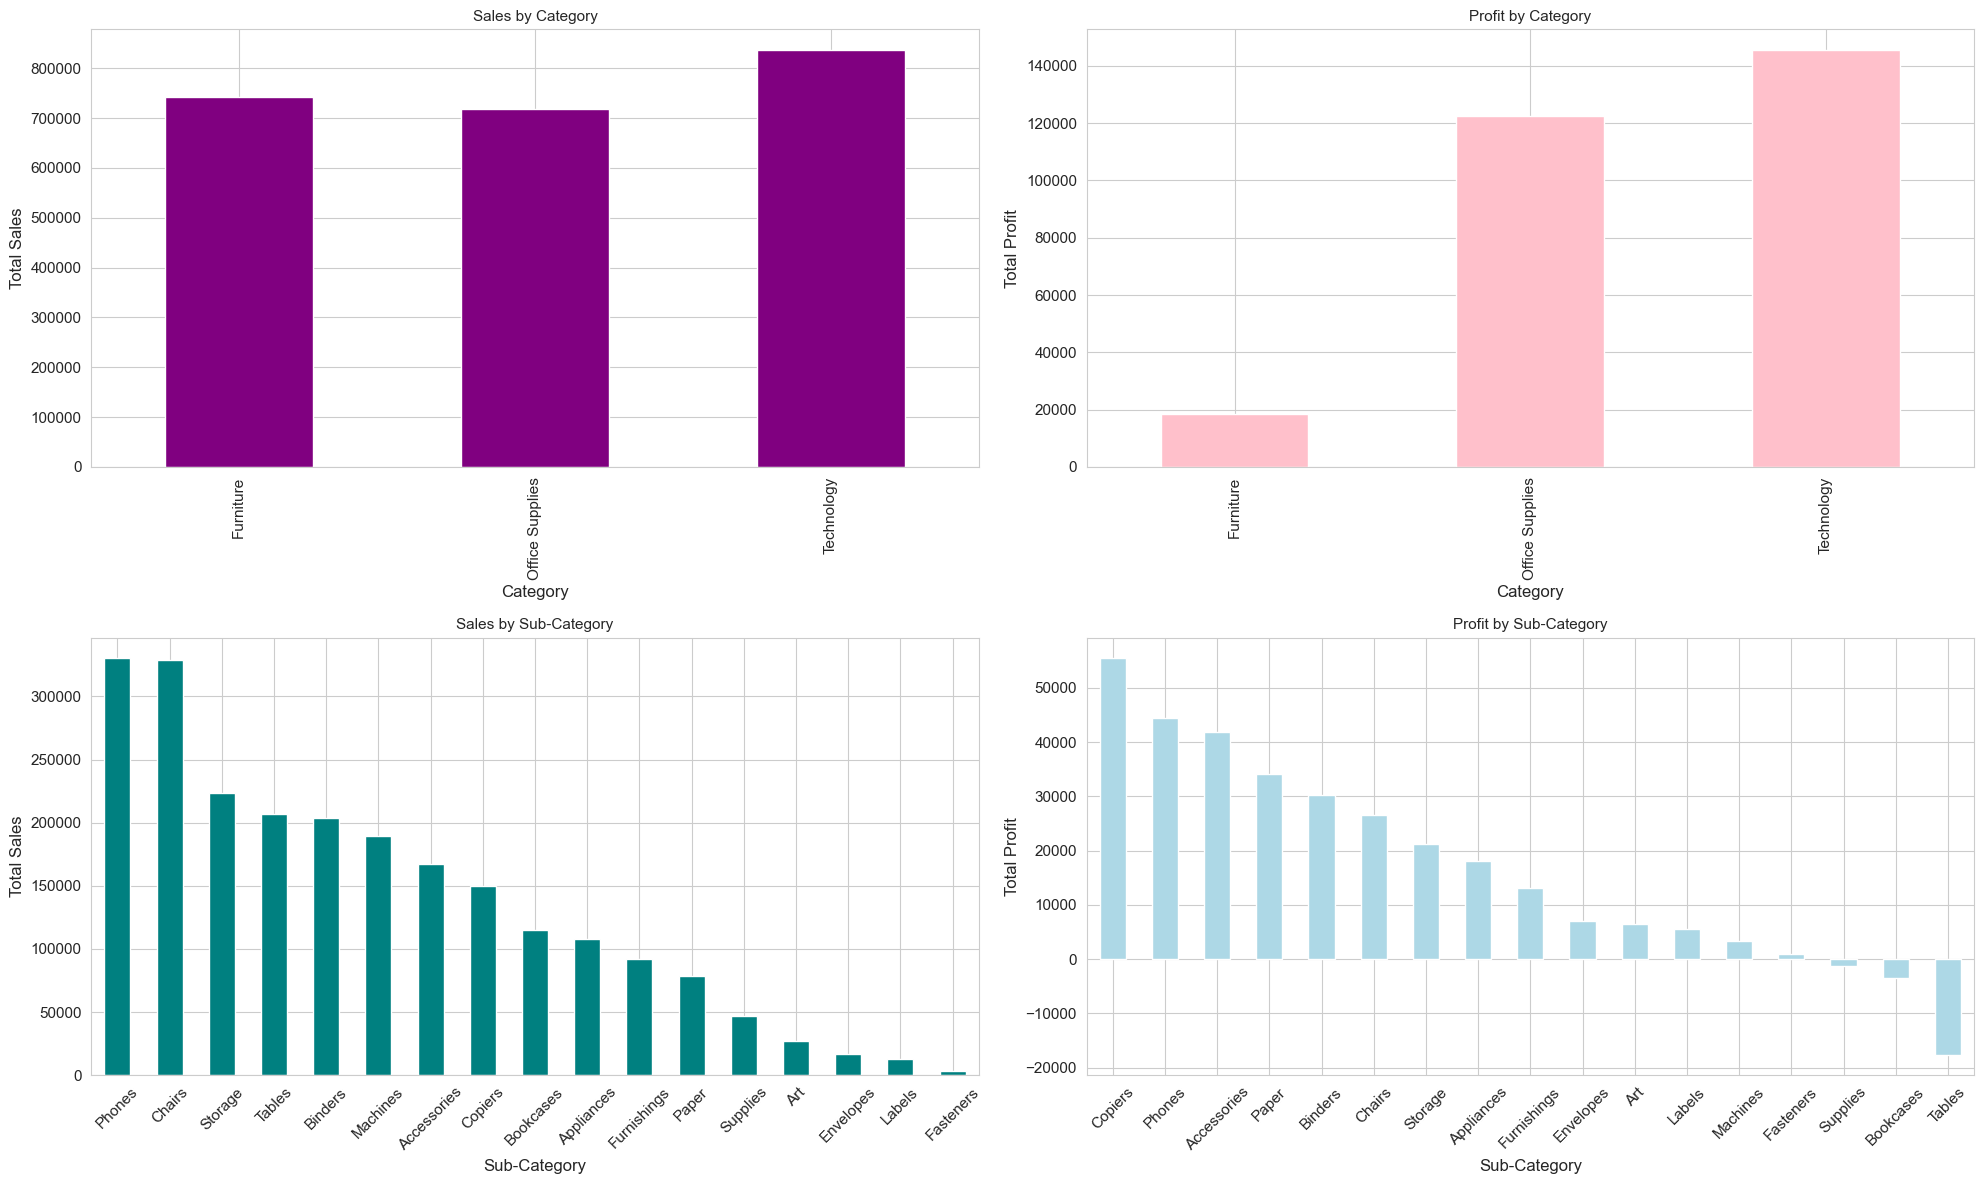

In [37]:
# Category & Sub-Category Analysis

# Sales and Profit by Category
category_sales = df.groupby('Category')['Sales'].sum()
category_profit = df.groupby('Category')['Profit'].sum()

# Sales and Profit by Sub-Category
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 12))

# Plotting Sales by Category
plt.subplot(2, 2, 1)
category_sales.plot(kind='bar', color='purple')
plt.title('Sales by Category')
plt.ylabel('Total Sales')

# Plotting Profit by Category
plt.subplot(2, 2, 2)
category_profit.plot(kind='bar', color='pink')
plt.title('Profit by Category')
plt.ylabel('Total Profit')

# Plotting Sales by Sub-Category
plt.subplot(2, 2, 3)
sub_category_sales.plot(kind='bar', color='teal')
plt.title('Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Plotting Profit by Sub-Category
plt.subplot(2, 2, 4)
sub_category_profit.plot(kind='bar', color='lightblue')
plt.title('Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **Conclusions and business insights:**

1. **Profitability and Discounts:** 
2. **Regional Insights:** 
3. **State-Level Insights:** 
4. **Segment Analysis:** 
5. **Category and Sub-Category Insights:**
6. **Product Diversification:** 
7. **Operational Efficiency:** 

In **conclusion**, the company has several *areas of strength*, such as its performance in the West and East regions and in the "Technology" category. However, there are *areas of opportunity*, like refining the discount strategy, improving profitability in the Central region and Texas, and addressing product-specific issues like the unprofitability of tables. By focusing on these areas, the company can significantly enhance its profitability and overall business performance.